In [1]:
import os.path

from benchmark.dataset_generator import generate, GeneratorConfig, Functions
from benchmark.transport import get_stub
from benchmark.visualization import plot_model_over_dataset, plot_dataset
from transport.generated.api_pb2 import TrainRequest, TrainerConfig, ModelConfig
from benchmark.benchmark_result import train_and_test, BenchmarkResult, train_and_test_sklearn


In [112]:
name = "deg_ndim.csv"
_, train, test = generate(name,
                          GeneratorConfig(dim=3, rows=1145, noize=0.1, functions=[lambda x: x,], split=(0.7, 0.3), dist_x=1, dist_y=1))
# plot_dataset("../internal/test-data/train.deg_1dim.csv")

### Зависимость от размера батча

running experiment 1
--running linear-50
----linear-50
--running poly2-50
----poly2-50
--running poly3-50
----poly3-50
running experiment 2
--running linear-100
----linear-100
--running poly2-100
----poly2-100
--running poly3-100
----poly3-100
running experiment 3
--running linear-150
----linear-150
--running poly2-150
----poly2-150
--running poly3-150
----poly3-150
running experiment 4
--running linear-200
----linear-200
--running poly2-200
----poly2-200
--running poly3-200
----poly3-200
running experiment 5
--running linear-250
----linear-250
--running poly2-250
----poly2-250
--running poly3-250
----poly3-250
running experiment 6
--running linear-300
----linear-300
--running poly2-300
----poly2-300
--running poly3-300
----poly3-300
running experiment 7
--running linear-350
----linear-350
--running poly2-350
----poly2-350
--running poly3-350
----poly3-350
running experiment 8
--running linear-400
----linear-400
--running poly2-400
----poly2-400
--running poly3-400
----poly3-400
runnin

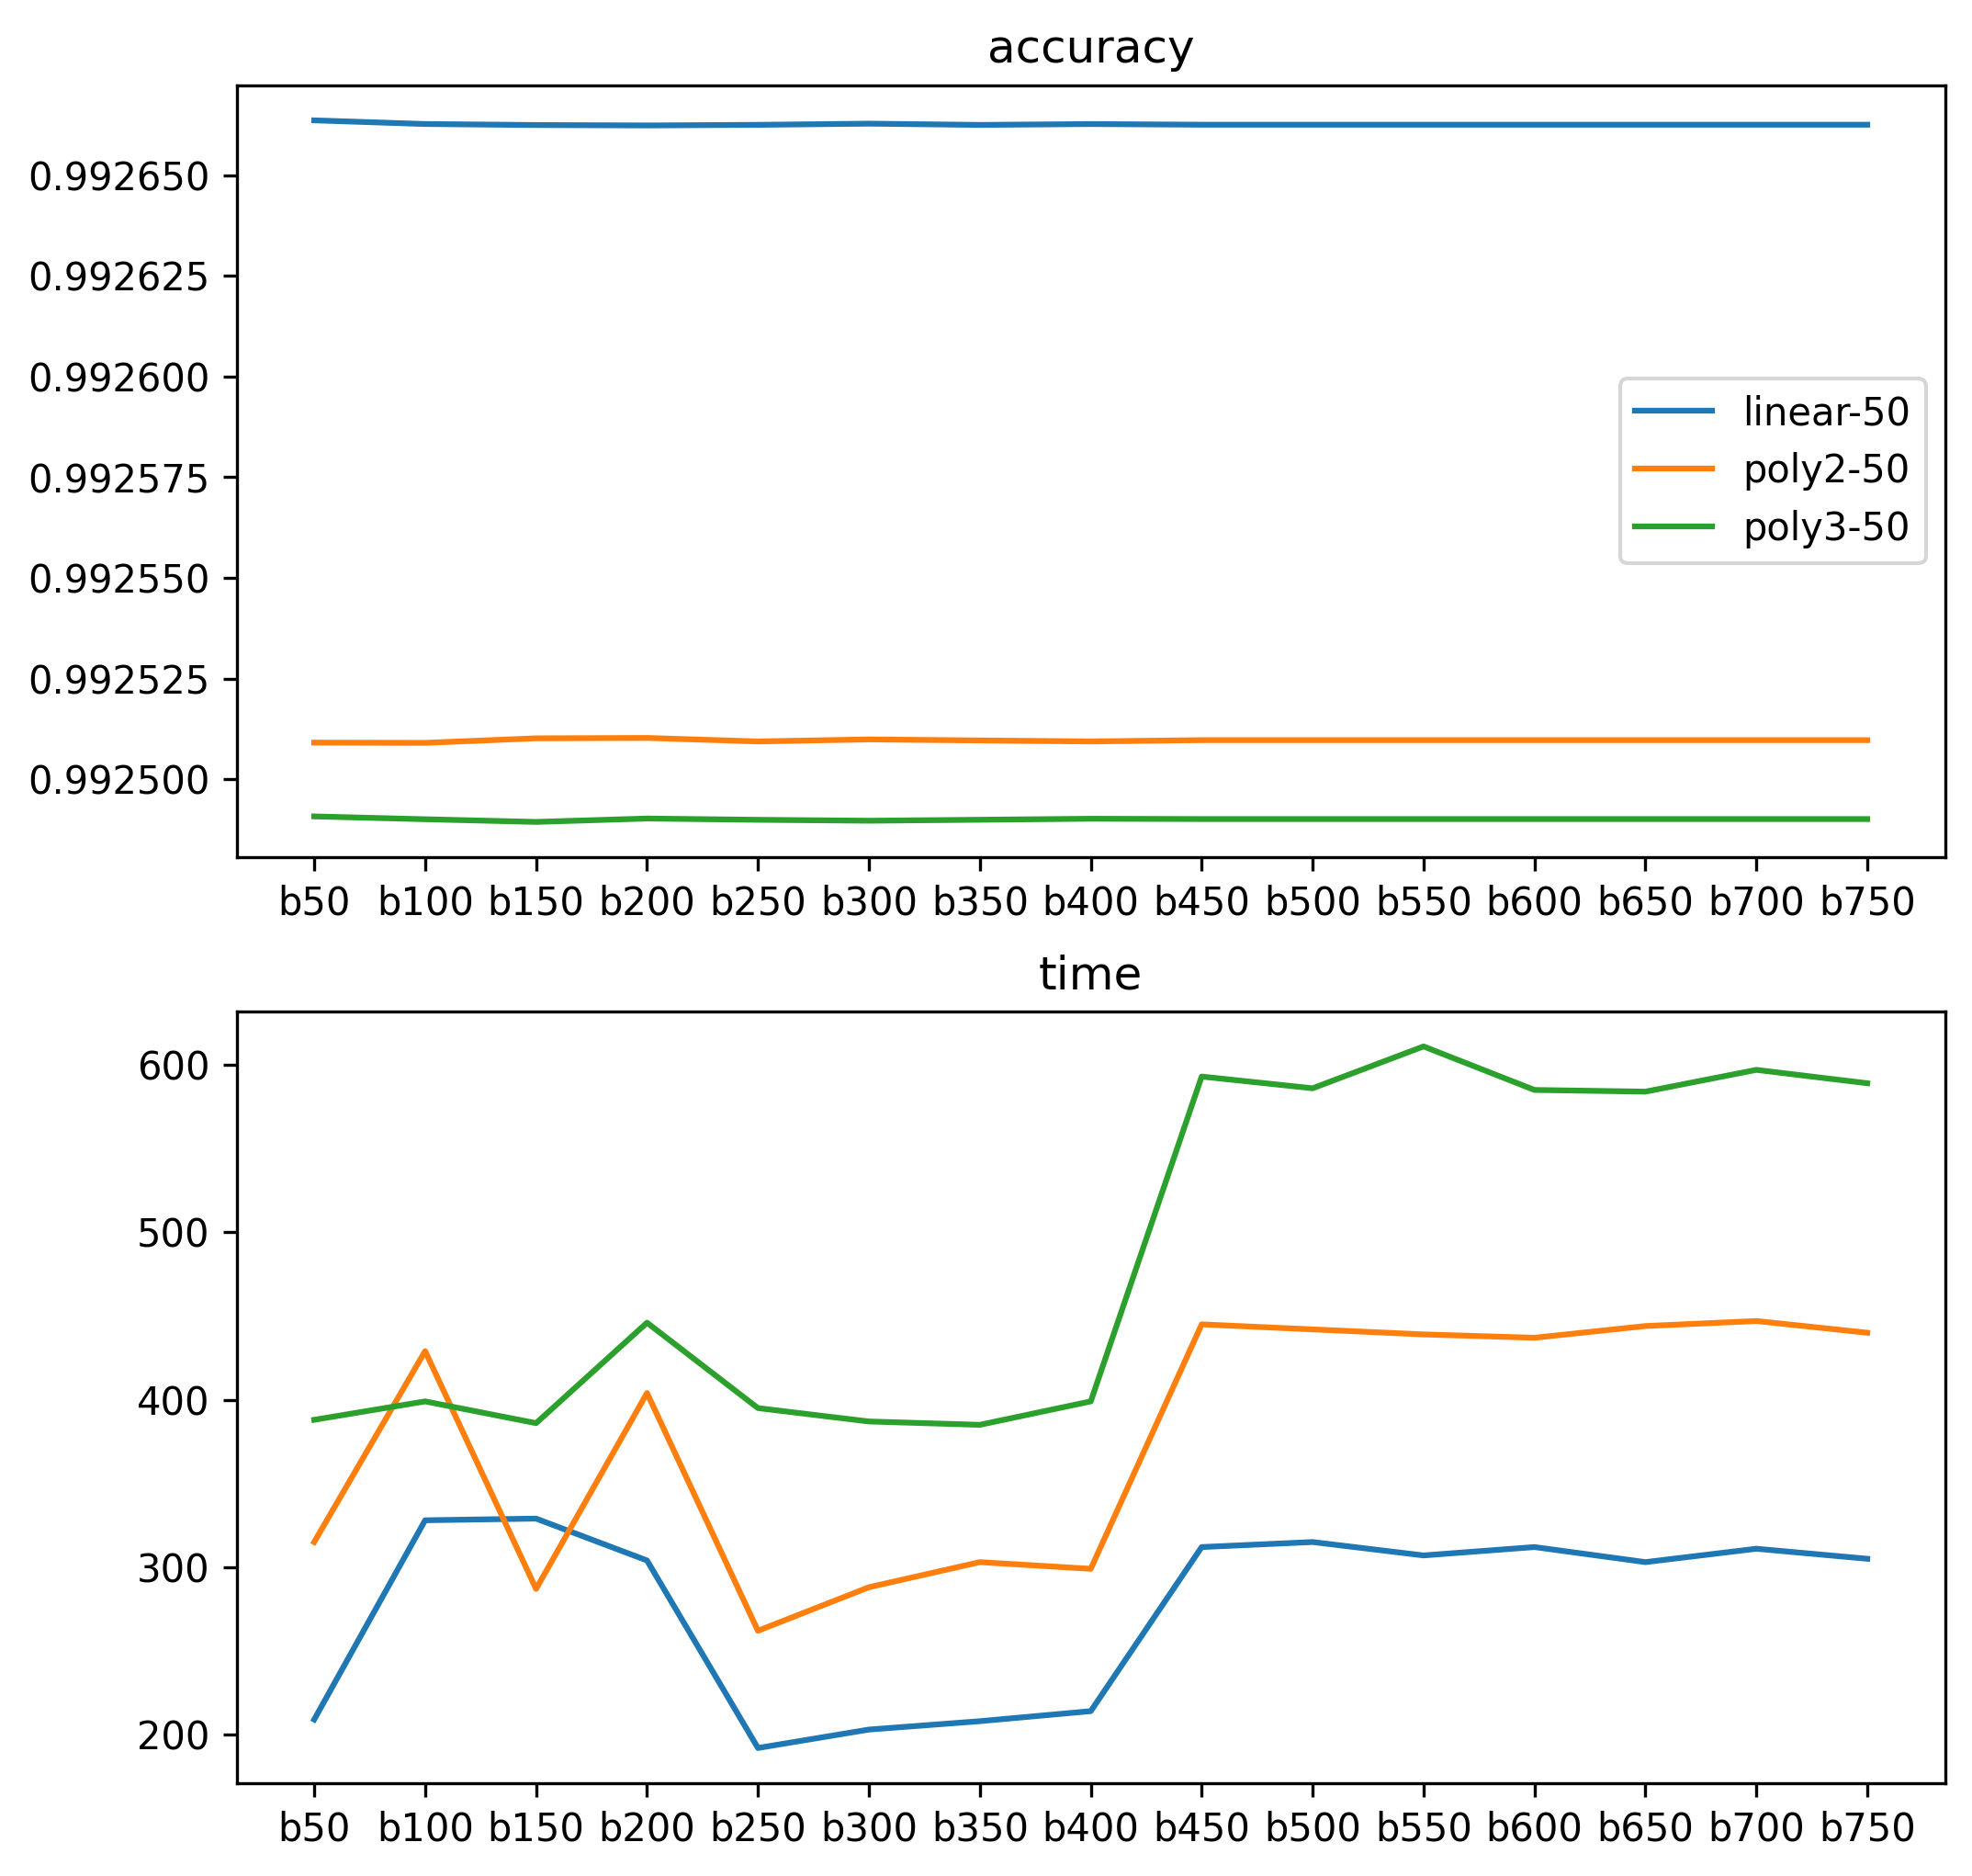

In [113]:
names = []


def experiment(idx, bsize, name):
    deg = idx
    f = lambda: train_and_test(name, f"../internal/test-data/{test}", TrainRequest(
        path=train,
        trainerConfig=TrainerConfig(type="BatchTrainer", params=[bsize, 1000000, 0, 0.1]),
        modelConfig=ModelConfig(type="PolynomialModel", regularizator="EmptyRegularizator", loss="MSELoss",
                                otherParams=[deg]),
    ))
    f.__name__ = name
    return f


res = []
for i in range(1, 16):
    names.append(f"b{i * 50}")
    bsize = i * 50 if i > 0 else 1
    res.append([experiment(1, bsize, f"linear-{bsize}"), experiment(2, bsize, f"poly2-{bsize}"),
                experiment(3, bsize, f"poly3-{bsize}")])

br = BenchmarkResult.series(res)        
# br.top(*br.results[0].parameters())
BenchmarkResult.plot_results(br, ("accuracy", "time"), names)
print()

### Зависимость от итераций

running experiment 1
--running linear-500
----linear-500
--running poly2-500
----poly2-500
--running poly3-500
----poly3-500
running experiment 2
--running linear-1000
----linear-1000
--running poly2-1000
----poly2-1000
--running poly3-1000
----poly3-1000
running experiment 3
--running linear-1500
----linear-1500
--running poly2-1500
----poly2-1500
--running poly3-1500
----poly3-1500
running experiment 4
--running linear-2000
----linear-2000
--running poly2-2000
----poly2-2000
--running poly3-2000
----poly3-2000
running experiment 5
--running linear-2500
----linear-2500
--running poly2-2500
----poly2-2500
--running poly3-2500
----poly3-2500
running experiment 6
--running linear-3000
----linear-3000
--running poly2-3000
----poly2-3000
--running poly3-3000
----poly3-3000
running experiment 7
--running linear-3500
----linear-3500
--running poly2-3500
----poly2-3500
--running poly3-3500
----poly3-3500
running experiment 8
--running linear-4000
----linear-4000
--running poly2-4000
----poly2

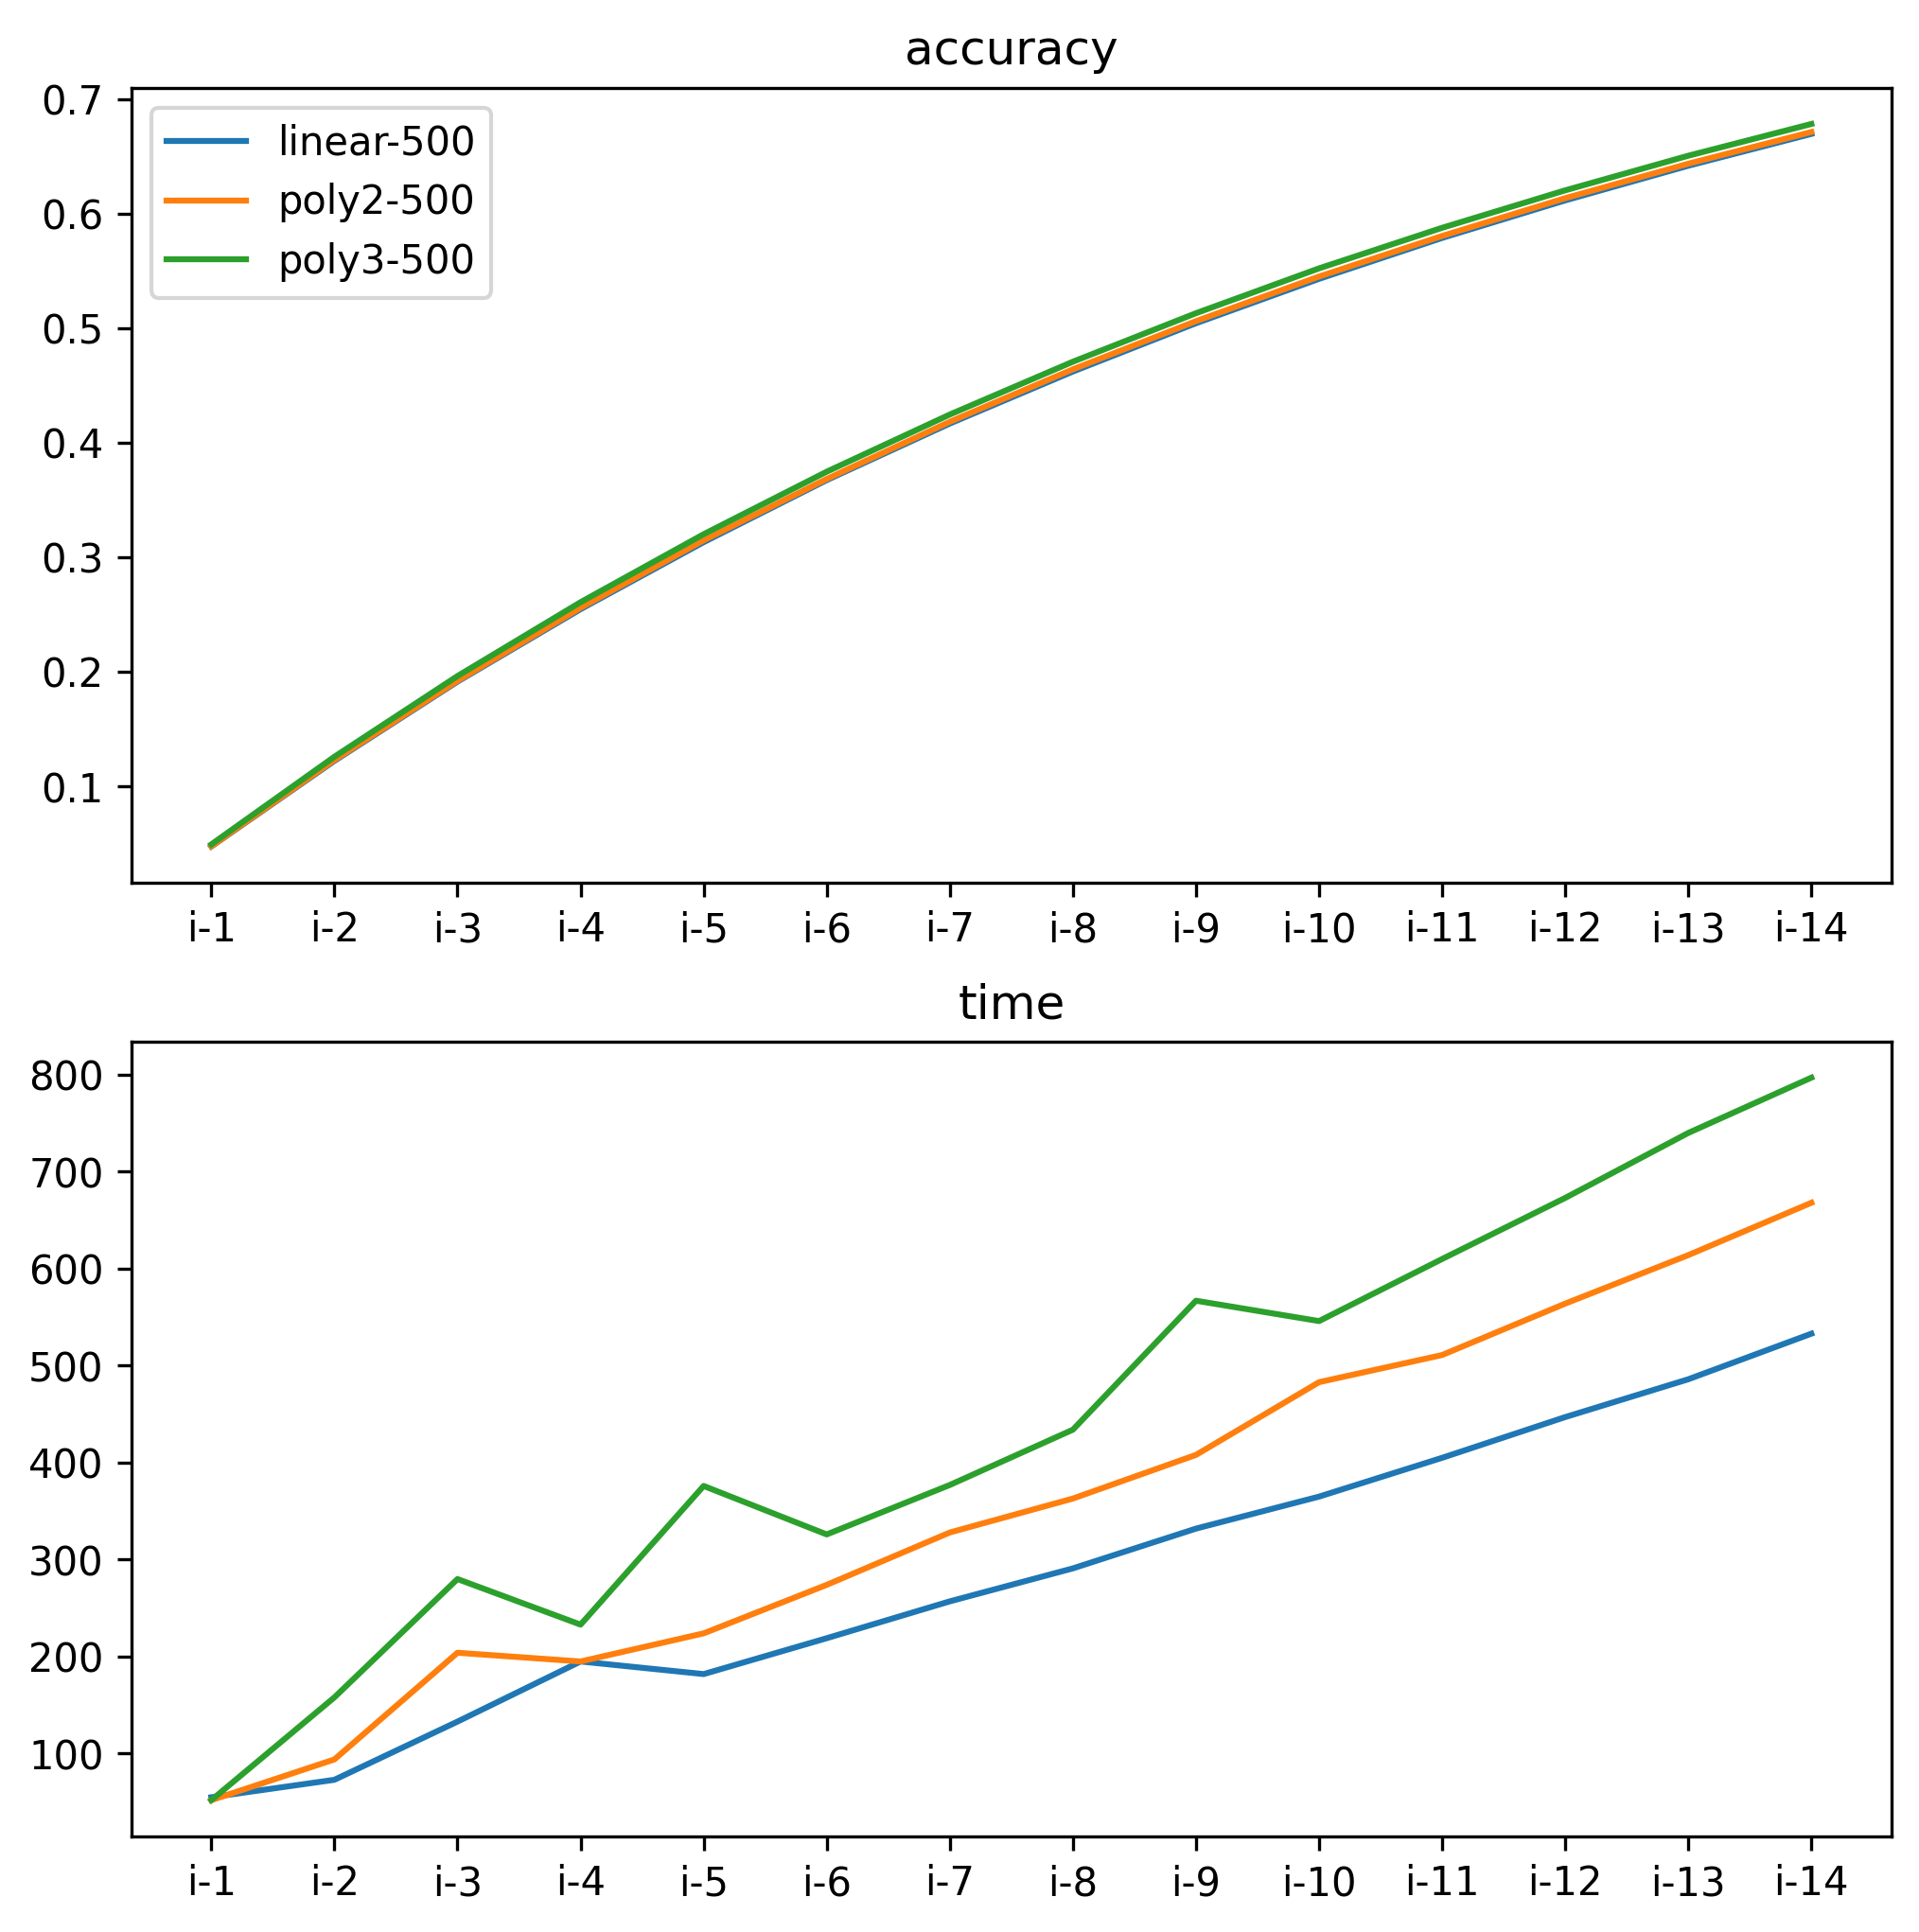

In [27]:
names = []


def experiment(deg, idx, name):
    f = lambda: train_and_test(name, f"../internal/test-data/{test}", TrainRequest(
        path=train,
        trainerConfig=TrainerConfig(type="BatchTrainer", params=[10, idx, 0, 0.001]),
        modelConfig=ModelConfig(type="PolynomialModel", regularizator="EmptyRegularizator", loss="MSELoss",
                                otherParams=[deg]),
    ))
    f.__name__ = name
    return f


res = []
for i in range(1, 15):
    iters = i * 500
    names.append(f"i-{i}")
    res.append([experiment(1, iters, f"linear-{iters}"), experiment(2, iters, f"poly2-{iters}"),
                experiment(3, iters, f"poly3-{iters}")])

br = BenchmarkResult.series(res)
# br.top(*br.results[0].parameters())
BenchmarkResult.plot_results(br, ("accuracy", "time"), names)

### Зависимость от тренера

running experiment 1
--running greedy-500
----greedy-500
--running batch-500
----batch-500
--running go_deep-500
----go_deep-500
running experiment 2
--running greedy-1000
----greedy-1000
--running batch-1000
----batch-1000
--running go_deep-1000
----go_deep-1000
running experiment 3
--running greedy-1500
----greedy-1500
--running batch-1500
----batch-1500
--running go_deep-1500
----go_deep-1500
running experiment 4
--running greedy-2000
----greedy-2000
--running batch-2000
----batch-2000
--running go_deep-2000
----go_deep-2000
running experiment 5
--running greedy-2500
----greedy-2500
--running batch-2500
----batch-2500
--running go_deep-2500
----go_deep-2500
running experiment 6
--running greedy-3000
----greedy-3000
--running batch-3000
----batch-3000
--running go_deep-3000
----go_deep-3000
running experiment 7
--running greedy-3500
----greedy-3500
--running batch-3500
----batch-3500
--running go_deep-3500
----go_deep-3500
running experiment 8
--running greedy-4000
----greedy-4000
--

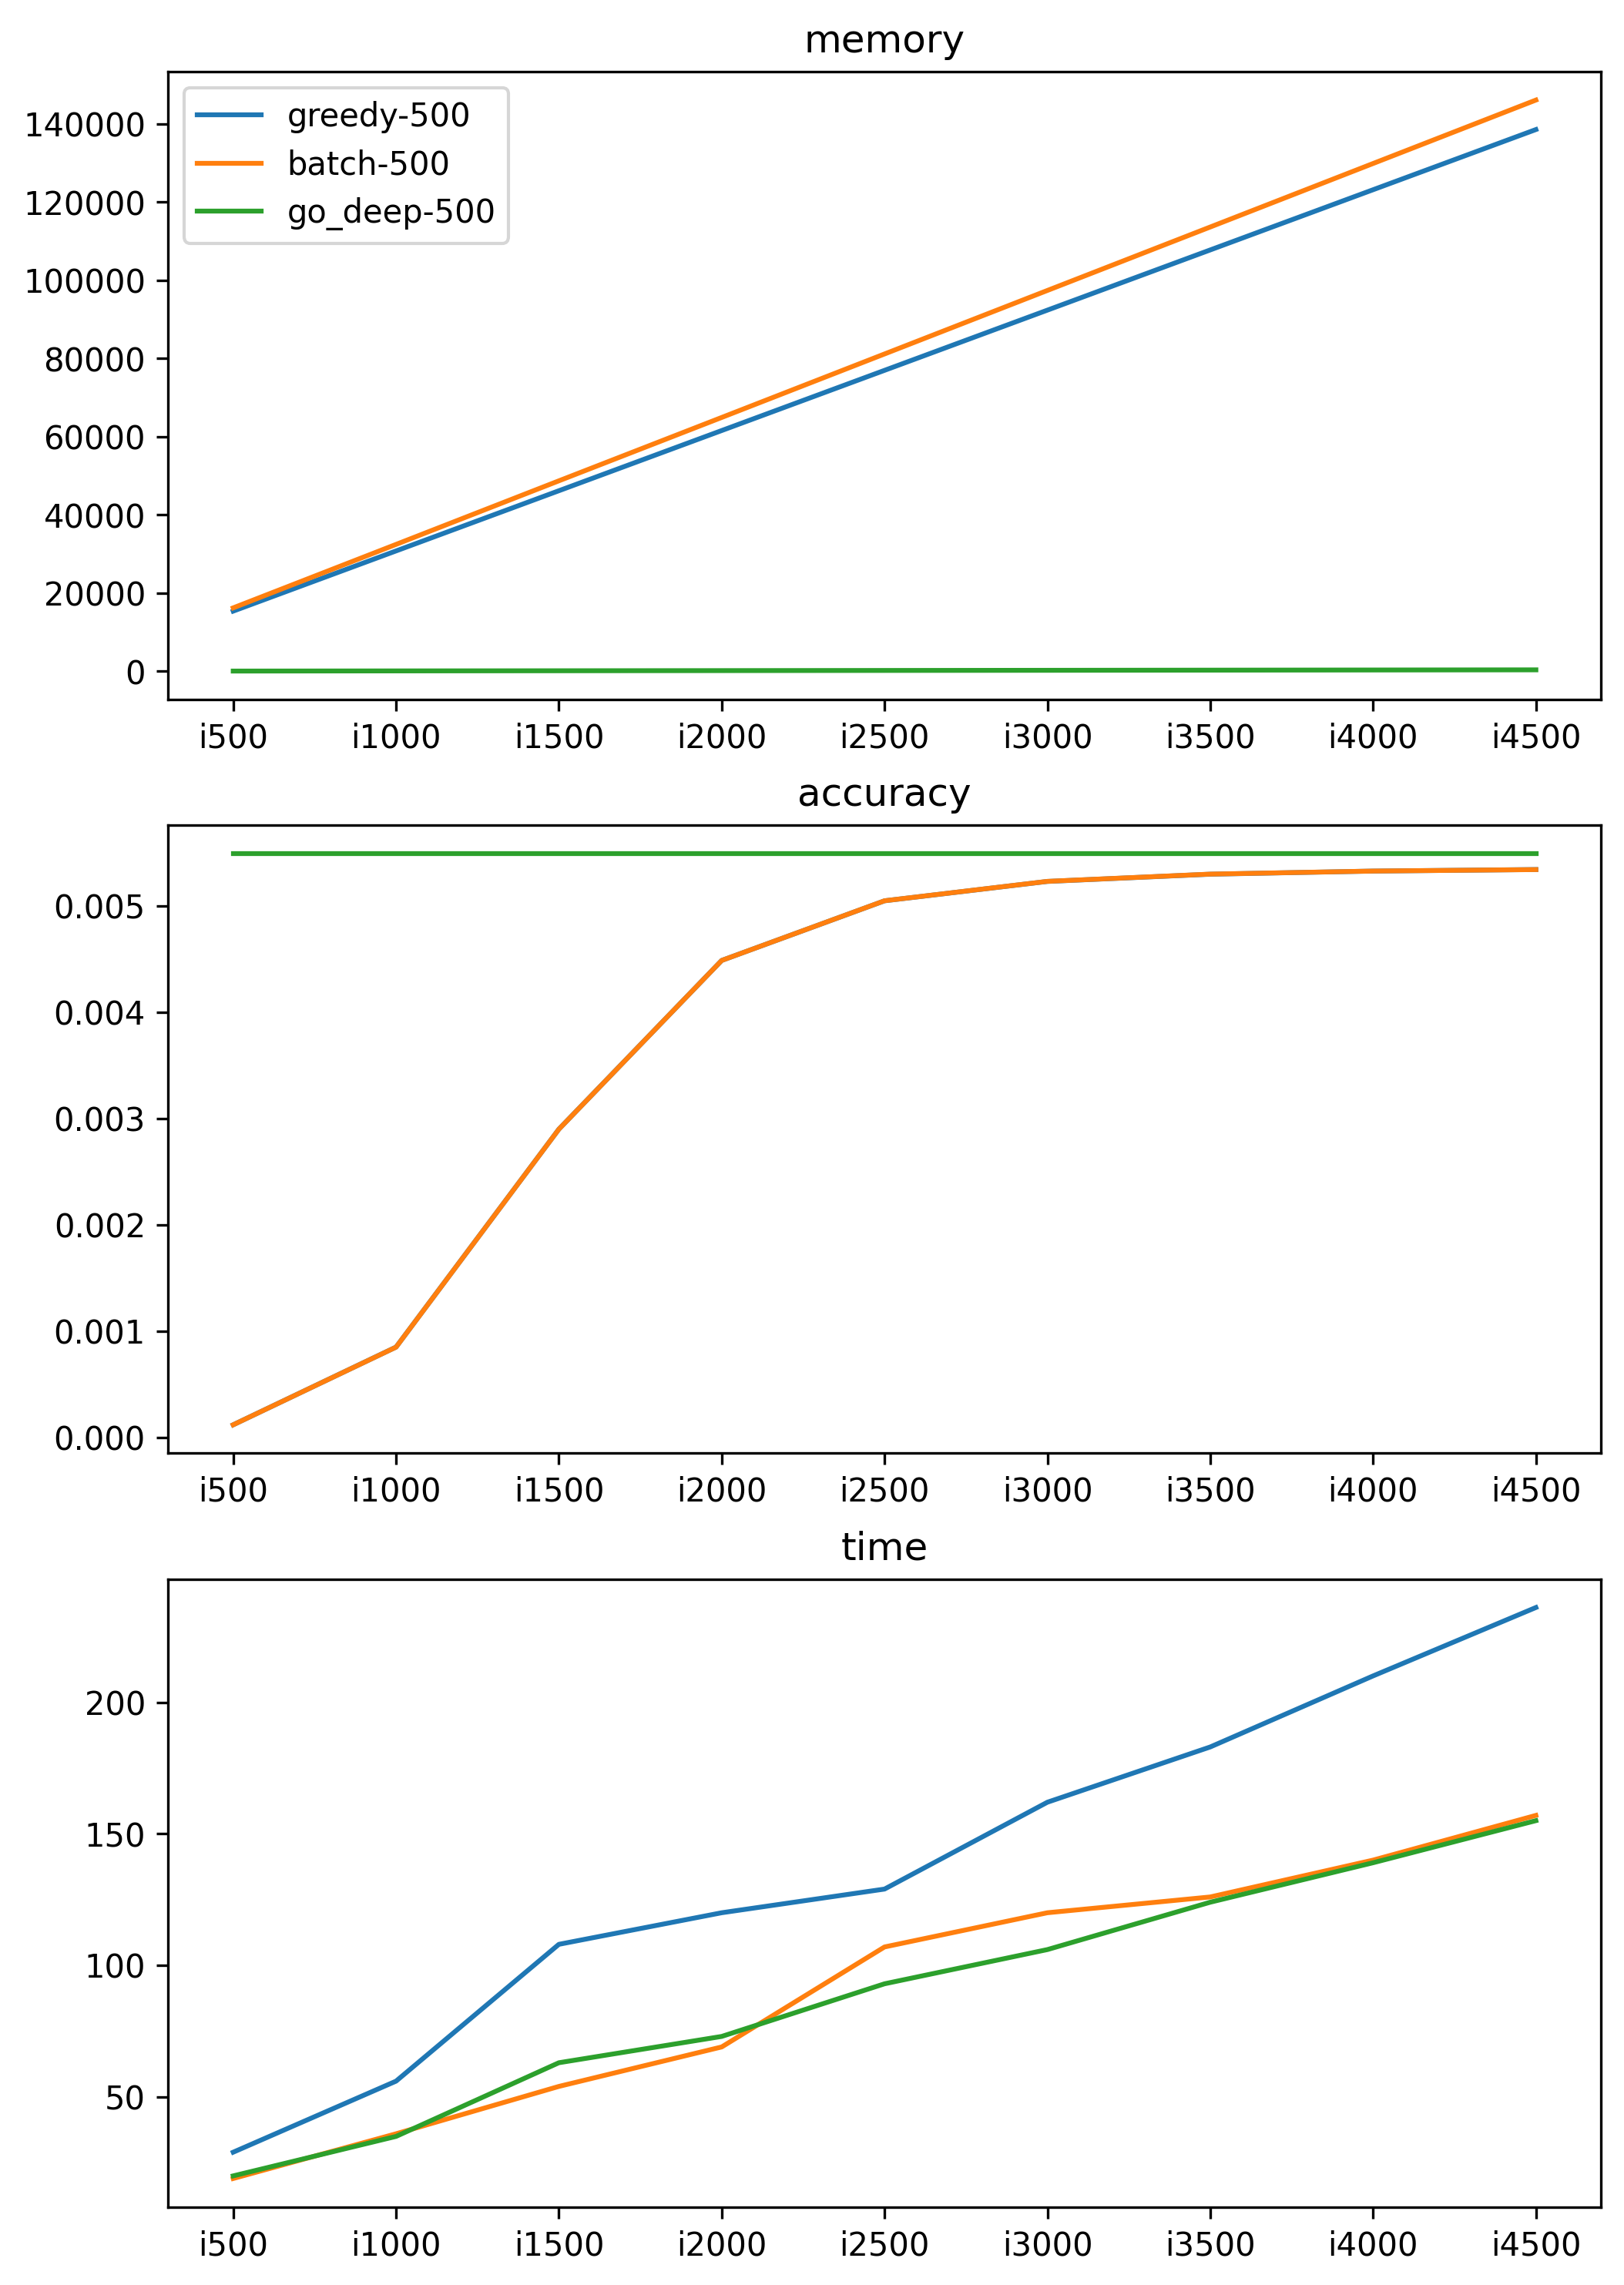

In [76]:
names = []


def experiment(trainer, params, name):
    f = lambda: train_and_test(name, f"../internal/test-data/{test}", TrainRequest(
        path=train,
        trainerConfig=TrainerConfig(type=trainer, params=params),
        modelConfig=ModelConfig(type="LinearModel", regularizator="EmptyRegularizator", loss="MSELoss"),
    ))
    f.__name__ = name
    return f


res = []
for i in range(1, 10):
    iters = i * 500
    names.append(f"i{iters}")
    res.append([
        experiment("GreedyTrainer", [iters, 0.001], f"greedy-{iters}"),
        experiment("BatchTrainer", [50, iters, 0, 0.001], f"batch-{iters}"),
        experiment("GoDeepTrainer", [iters], f"go_deep-{iters}")
    ])

br = BenchmarkResult.series(res)
# br.top(*br.results[0].parameters())
BenchmarkResult.plot_results(br, ("memory", "accuracy", "time"), names)

### Зависимость от learning rate

In [81]:
params = (
    [50, 1000, 0, 0.001],
    [50, 1000, 1, 0.01, 0.999],
    [50, 1000, 2, 0.01, 0.00001]
)

res = []

for p in params:
    def get_f(p):
        f = lambda: train_and_test(str(p), f"../internal/test-data/{test}", TrainRequest(
            path=train,
            trainerConfig=TrainerConfig(type="BatchTrainer", params=p),
            modelConfig=ModelConfig(type="LinearModel", regularizator="EmptyRegularizator", loss="MSELoss"),
        ))
        f.__name__ = str(p)
        return f


    res.append(get_f(p.copy()))

br = BenchmarkResult.compare(res)
br.top(*br.results[0].parameters())
# BenchmarkResult.plot_results(br, ("memory", "accuracy", "time"), names)

--running [50, 1000, 0, 0.001]
----[50, 1000, 0, 0.001]
--running [50, 1000, 1, 0.01, 0.999]
----[50, 1000, 1, 0.01, 0.999]
--running [50, 1000, 2, 0.01, 1e-05]
----[50, 1000, 2, 0.01, 1e-05]
sorted by accuracy
| name                       |   accuracy |   memory |   time |
|----------------------------+------------+----------+--------|
| [50, 1000, 0, 0.001]       | 0.00085212 |    32475 |     59 |
| [50, 1000, 1, 0.01, 0.999] | 0.00535615 |    32467 |     53 |
| [50, 1000, 2, 0.01, 1e-05] | 0.00536317 |    32477 |     63 |

sorted by memory
| name                       |   accuracy |   memory |   time |
|----------------------------+------------+----------+--------|
| [50, 1000, 1, 0.01, 0.999] | 0.00535615 |    32467 |     53 |
| [50, 1000, 0, 0.001]       | 0.00085212 |    32475 |     59 |
| [50, 1000, 2, 0.01, 1e-05] | 0.00536317 |    32477 |     63 |

sorted by time
| name                       |   accuracy |   memory |   time |
|----------------------------+------------+--------

In [23]:


res = []

f1 = lambda: train_and_test("Batch", f"../internal/test-data/{test}", TrainRequest(
    path=train,
    trainerConfig=TrainerConfig(type="BatchTrainer", params=[300, 40, 0, 2]),
    modelConfig=ModelConfig(type="LinearModel", regularizator="EmptyRegularizator", loss="MSELoss",),
))
f1.__name__ = "Batch"

f2 = lambda : train_and_test_sklearn("Sklearn", f"../internal/test-data/{train}", f"../internal/test-data/{test}")
f2.__name__ = "Sklearn"

res.append(f1)
res.append(f2)

br = BenchmarkResult.compare(res)
br.top("accuracy", "time")
# BenchmarkResult.plot_results(br, ("memory", "accuracy", "time"), names)

--running Batch
----Batch
--running Sklearn
----Sklearn
sorted by accuracy
| name    |   accuracy |   time |
|---------+------------+--------|
| Batch   | 0.99988690 |    221 |
| Sklearn | 0.99990147 |     41 |

sorted by time
| name    |   accuracy |   time |
|---------+------------+--------|
| Sklearn | 0.99990147 |     41 |
| Batch   | 0.99988690 |    221 |


running experiment 1
--running go-10
----go-10
--running sklearn-10
----sklearn-10
running experiment 2
--running go-20
----go-20
--running sklearn-20
----sklearn-20
running experiment 3
--running go-30
----go-30
--running sklearn-30
----sklearn-30
running experiment 4
--running go-40
----go-40
--running sklearn-40
----sklearn-40
running experiment 5
--running go-50
----go-50
--running sklearn-50
----sklearn-50
running experiment 6
--running go-60
----go-60
--running sklearn-60
----sklearn-60
running experiment 7
--running go-70
----go-70
--running sklearn-70
----sklearn-70
running experiment 8
--running go-80
----go-80
--running sklearn-80
----sklearn-80
running experiment 9
--running go-90
----go-90
--running sklearn-90
----sklearn-90
running experiment 10
--running go-100
----go-100
--running sklearn-100
----sklearn-100


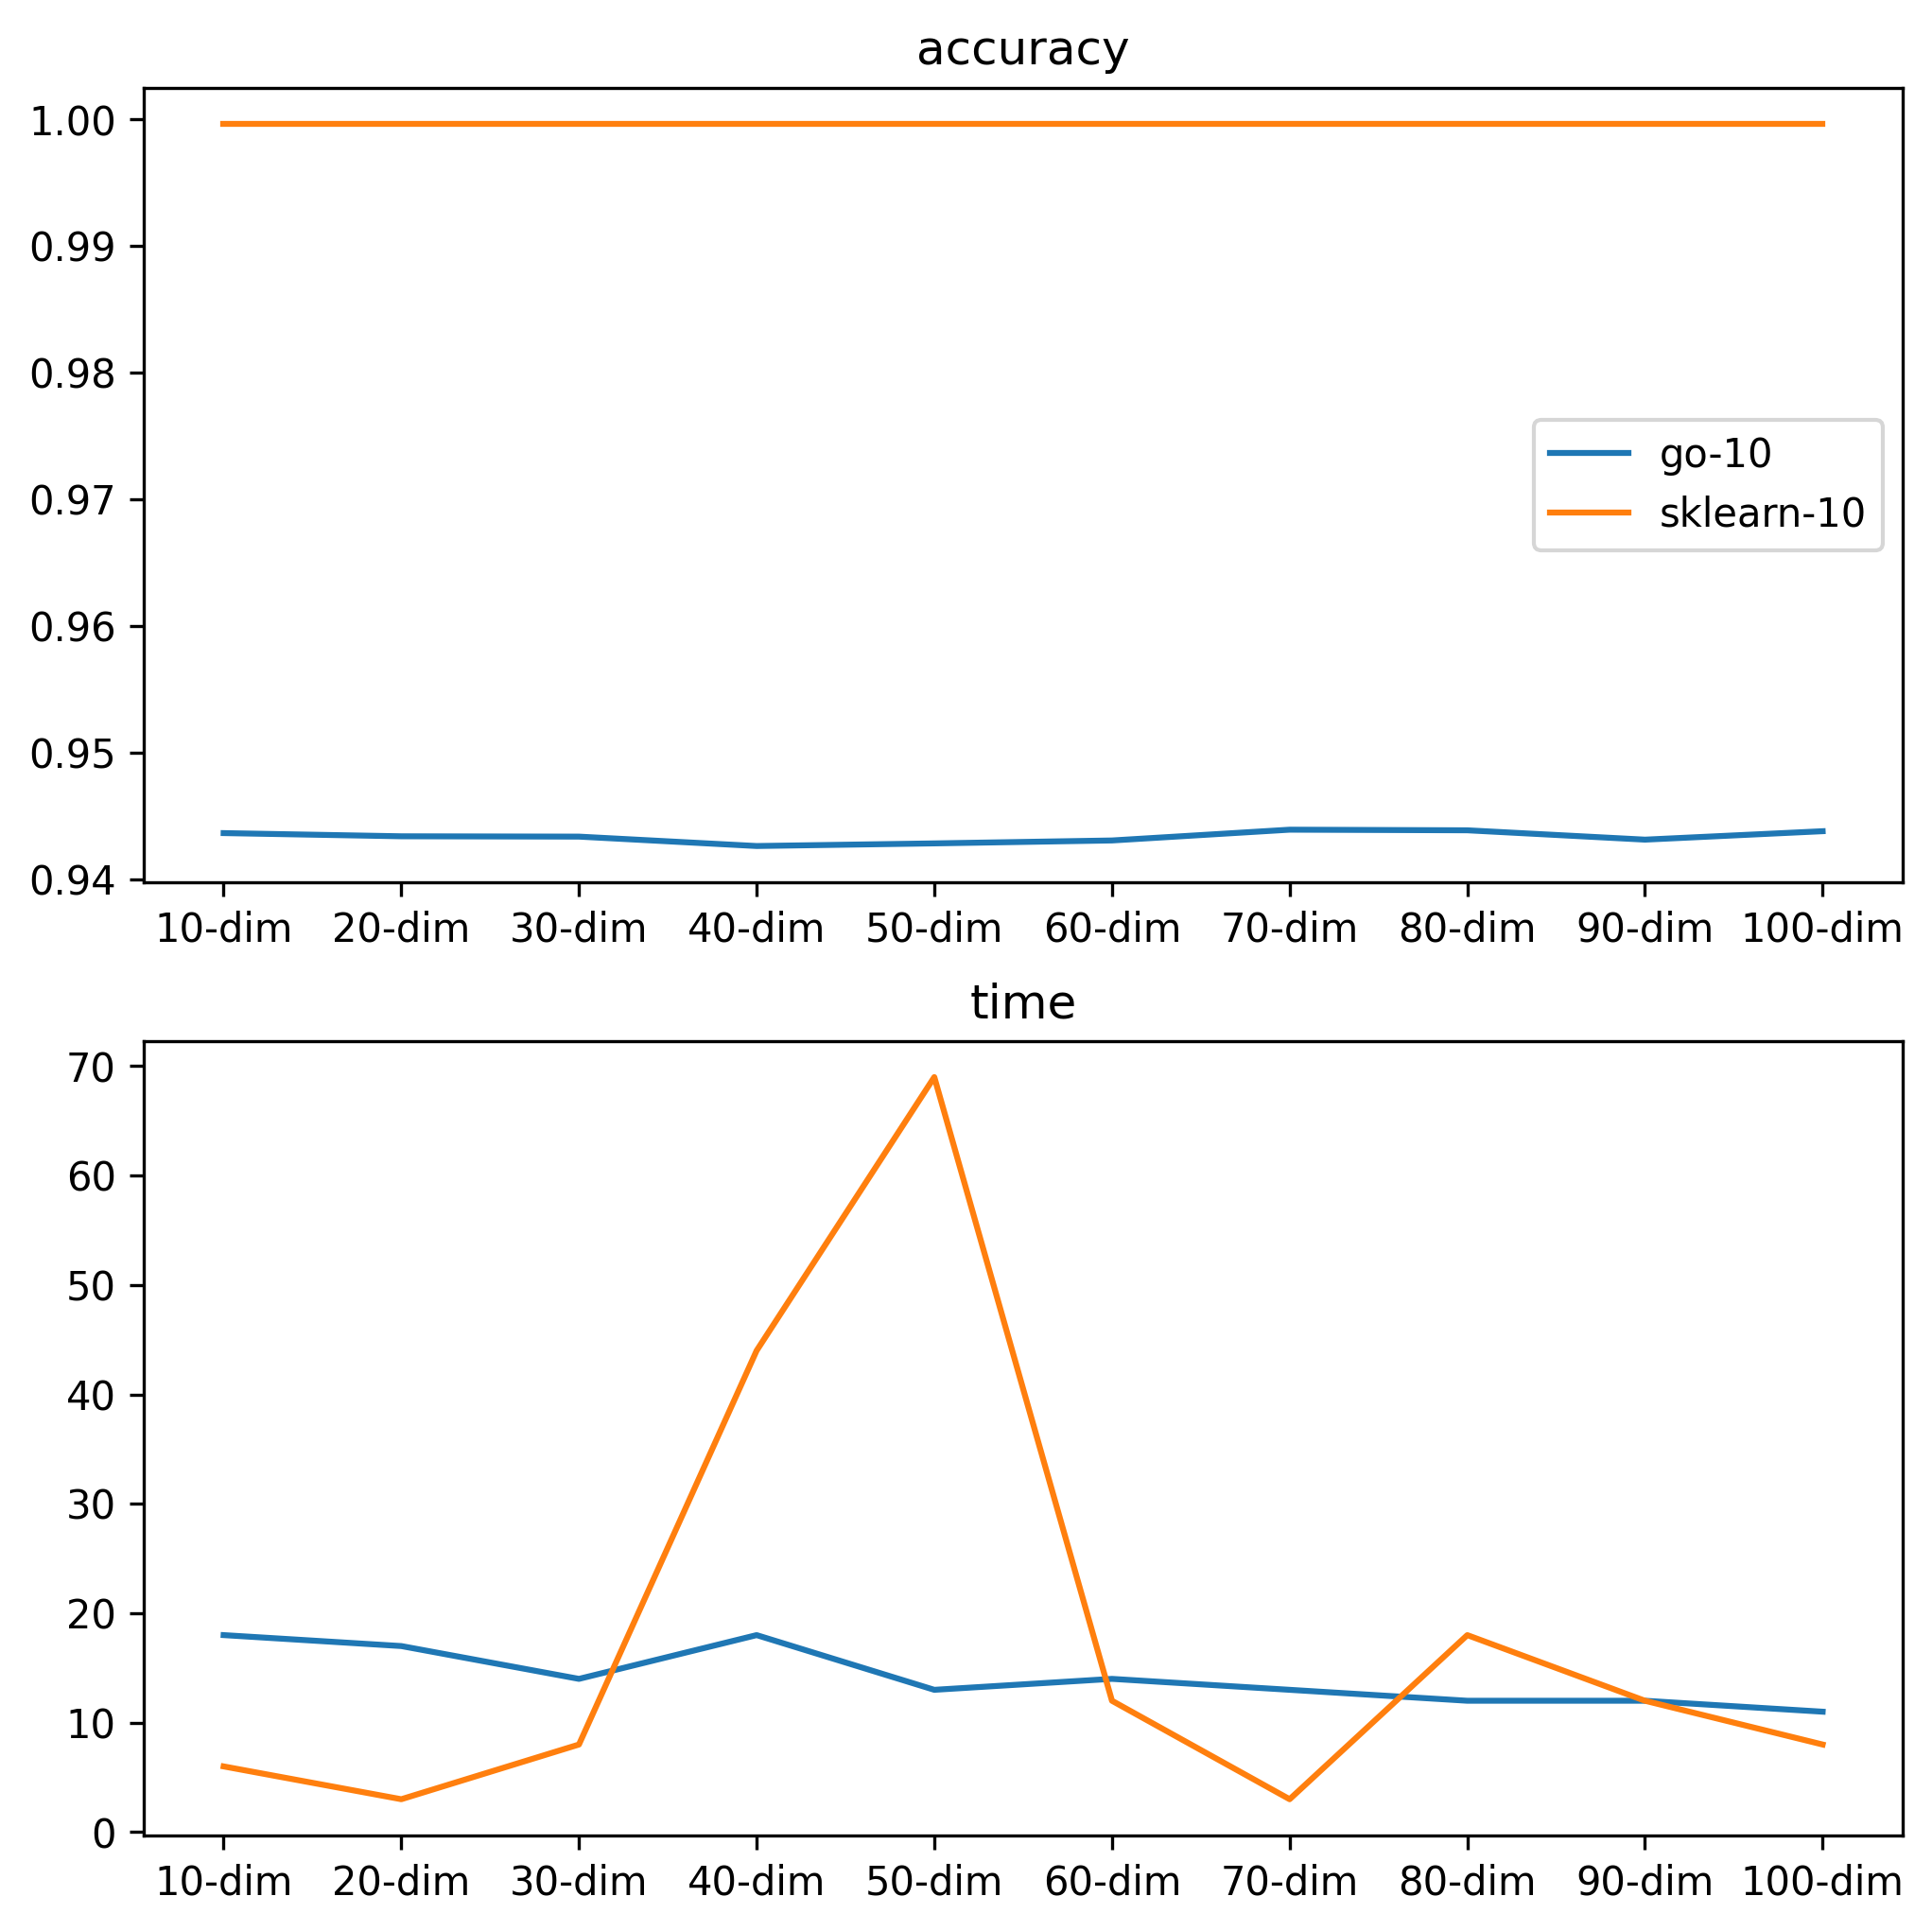

sorted by accuracy
| name       |   accuracy |   time |
|------------+------------+--------|
| go-10      | 0.94362651 |     18 |
| sklearn-10 | 0.99966212 |      6 |

sorted by time
| name       |   accuracy |   time |
|------------+------------+--------|
| sklearn-10 | 0.99966212 |      6 |
| go-10      | 0.94362651 |     18 |


In [60]:
res = []
names = []
def experiment(dim):
    name = "deg_ndim.csv"
    _, train, test = generate(name,
                          GeneratorConfig(dim=dim, rows=200, noize=0.1, functions=[lambda x: x,], split=(0.7, 0.3), dist_x=1, dist_y=1))
    name1 = f"go-{dim}"
    f1 = lambda: train_and_test(name1, f"../internal/test-data/{test}", TrainRequest(
        path=train,
        trainerConfig=TrainerConfig(type="BatchTrainer", params=[15, 50, 0, 1.5]),
        modelConfig=ModelConfig(type="LinearModel", regularizator="EmptyRegularizator", loss="MSELoss",),
    ))
    f1.__name__ = name1
    
    name2 = f"sklearn-{dim}"
    f2 = lambda : train_and_test_sklearn(name2, f"../internal/test-data/{train}", f"../internal/test-data/{test}")
    f2.__name__ = name2

    return f1, f2



for i in range(1, 11):
    dim = i * 10
    names.append(f"{dim}-dim")
    res.append(experiment(dim))

br = BenchmarkResult.series(res)
# br.top("accuracy", "time")
BenchmarkResult.plot_results(br, ("accuracy", "time"), names)
br[0].top("accuracy", "time")